In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from xgboost import plot_importance
import ast


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

RSEED = 42


In [ ]:
pip freeze

aiohttp==3.8.3
aiosignal==1.3.1
altair==4.1.0
anyio==3.6.2
appnope==0.1.3
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.1.0
async-timeout==4.0.2
attrs==22.1.0
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
certifi==2022.9.24
cffi==1.15.1
charset-normalizer==2.1.1
click==8.1.3
cycler==0.11.0
dash==2.7.0
dash-core-components==2.0.0
dash-html-components==2.0.0
dash-table==5.0.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==1.2.0
fastjsonschema==2.16.2
Flask==2.2.2
fonttools==4.38.0
frozenlist==1.3.3
idna==3.4
importlib-metadata==5.0.0
iniconfig==1.1.1
ipykernel==6.17.1
ipython==8.6.0
ipython-genutils==0.2.0
ipywidgets==7.6.5
itsdangerous==2.1.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.10
jsonschema==4.17.1
jupyter-server==1.23.3
jupyter-server-proxy==3.2.2
jupyter_client==7.4.7
jupyter_core==5.0.0
jupyterlab==3.2.5
jupyterlab-dash==0.1.0a3
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.3
jupyterlab_server==

In [ ]:

import glob
import os

path = r'data/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)


## EDA

## Description of the clomns

# Columns 
'backers_count', 
'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [ ]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [ ]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,USD,1552539775,False,NaN,1.000000,28000.0,2108505034,NaN,False,NaN,1548223375,"{""id"":2462429,""name"":""Novato"",""slug"":""novato-c...",Babalus Children's Shoes,NaN,"{""key"":""assets/023/667/205/a565fde5382d6b53276...",28645.0,"{""id"":3508024,""project_id"":3508024,""state"":""in...",babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",28645.000000,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,USD,1504976459,False,NaN,1.000000,1000.0,928751314,NaN,False,NaN,1502384459,"{""id"":2400549,""name"":""Euless"",""slug"":""euless-t...",The Ofrenda Oracle Deck,NaN,"{""key"":""assets/017/766/989/dd9f18c773a8546d996...",1950.0,"{""id"":3094785,""project_id"":3094785,""state"":""ac...",the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1950.000000,domestic
2,271,"Electra's long awaited, eclectic Debut Pop/Roc...","{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",22404,US,1348987533,"{""id"":323849677,""name"":""Electra"",""is_registere...",USD,$,True,USD,1371013395,False,NaN,1.000000,15000.0,928014092,NaN,False,NaN,1368421395,"{""id"":2423474,""name"":""Hollywood"",""slug"":""holly...","Record Electra's Debut Album (Pop, Rock, Class...",NaN,"{""key"":""assets/011/433/681/489fd66f7861fefd8c8...",22404.0,"{""id"":359847,""project_id"":359847,""state"":""inac...",record-electras-debut-album-pop-rock-classical,https://www.kickstarter.com/discover/categorie...,True,False,successful,1371013395,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",22404.000000,international
3,3,The Mist of Tribunal is a turn-based card game...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",165,GB,1483780271,"{""id"":196281496,""name"":""Artur Ordijanc (delete...",GBP,£,False,USD,1489425776,False,NaN,1.308394,10000.0,596091328,NaN,False,NaN,1484245376,"{""id"":475457,""name"":""Kaunas"",""slug"":""kaunas-ka...",The Mist of Tribunal - A Card Game,NaN,"{""key"":""assets/015/091/198/216fbf1bdc3739e7971...",136.0,"{""id"":2825329,""project_id"":2825329,""state"":""in...",the-mist-of-tribunal-a-card-game,https://www.kickstarter.com/discover/categorie...,False,False,failed,1489425776,1.216066,"{""web"":{""project"":""https://www.kickstarter.com...",165.384934,domestic
4,3,"Livng with a brain impairment, what its like t...","{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",2820,US,1354817071,"{""id"":1178460181,""name"":""Dawn Johnston"",""is_re...",USD,$,True,USD,1357763527,False,NaN,1.000000,2800.0,998516049,NaN,False,NaN,1355171527,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t...",Help change the face of Brain Impairment,NaN,"{""key"":""assets/011/457/844/37ba63d35fefaba76e9...",2820.0,"{""id"":417385,""project_id"":417385,""state"":""inac...",help-change-the-face-of-brain-impairment,https://www.kickstarter.com/discover/categorie...,True,False,successful,1357763527,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2820.000000,domestic


We want to extract the slug out of the category column dictionary and separate the main genre out of it.

In [ ]:
# we want to get the information after the key slug out of the sting in the category column
# we have a string in the format of a dictionary so we transform the string to a dictionary
df['category'] = df['category'].apply(lambda x: ast.literal_eval(x))
#then we can extract the information of the key: slug in the dictionary and get back the genre
df['category_slug'] = df['category'].apply(lambda x: x.get('slug'))

In [ ]:
#we get back a string with a combination of two genres,separated by a /. We only want to have the first one,
#so we split by / and select only the first entry of the now list of splitted words.
df['category_slug'] = df['category_slug'].apply(lambda x: x.split("/")[0])

In [ ]:
#show the genres of the projects
df['category_slug']

0              fashion
1                games
2                music
3                games
4           publishing
              ...     
209217           games
209218           music
209219      technology
209220    film & video
209221      journalism
Name: category_slug, Length: 209222, dtype: object


# candidates columns to be deleted:
> *blurb* : only non qualitativ descriptive information about the project 

> *category*: we keep it for future model processing. The values of this column are dictionary packed as string. It dosen't provide us directly with a quantitative value. Later may be we extract some usefull numerical information from it. 

> *creators* : same reasons as for categories  

> *currency_symbol*

> *currency_trailing_code*

> *slug*

> *source_url*

> *spotlight*

> *state_usd_rate*

> *urls*

> *friends* : it contains just NaN and "[ ]".

> *fx_rate* 

> *id*

> *is_starred*

> *is_backing*

> *location*

> *permissions*

> *photo*

> *pledged*

> *name*

> *profile*

# candidates for dummies
> *country*

> *currency*
# candidate for type-transformation

> *created_at* we want to have a DateTime type!

> *statechange_at* we want to have a DateTime datatype!

> *launched_at*

# *Target* : state

As we see in the foolowing code the currency, currency_symbol and currency_trailing_code are completly correlated. So we can delete two of them.

In [ ]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['currency_symbol']=='€') & (df['currency_trailing_code']==True)])

0

In [ ]:
# in this code we show that all currencies not US dollars have a False value for currency_trailing_code variable.
len(df[(df['friends'].isnull()) & (df['state']=="successful")])

117465

Here we delete the clomuns we don't need!

In [ ]:
# in this cell we delete the unwanted columns!
df_1= df.drop(['blurb', 'category', 'creator', 'currency_symbol',
       'currency_trailing_code', 'friends', 'fx_rate', 'id',
       'is_backing', 'is_starred', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight',
       'static_usd_rate', 'urls'], axis=1)

In [ ]:
# we change the type of columns "crerated_at", "launched_at", "deadline" and "state_changed_at". 
# We note that the unit of this columns is Second!
#df_1[["created_at", "launched_at", "deadline", "state_changed_at"]] = df_1[["created_at", "launched_at", "deadline", "state_changed_at"]].apply(pd.to_datetime, unit='s')

In [ ]:
#we want to extract day, month and your out of the data and store them in different columns
#df_1['created_at_year'] = df_1['created_at'].dt.year
#df_1['created_at_month'] = df_1['created_at'].dt.month
#df_1['created_at_day'] = df_1['created_at'].dt.day

In [ ]:
df_1.head(2)

,backers_count,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,goal,is_starrable,launched_at,staff_pick,state,state_changed_at,usd_pledged,usd_type,category_slug
0,315,28645,US,1541459205,USD,USD,1552539775,False,28000.0,False,1548223375,False,live,1548223375,28645.0,international,fashion
1,47,1950,US,1501684093,USD,USD,1504976459,False,1000.0,False,1502384459,False,successful,1504976459,1950.0,domestic,games


In [ ]:
# In this cell we delete all rows of the dataframe with the state value of "live". 
# Because this rows do not tell us an thing about the succeed of the project.

df_1 = df_1[(df_1.state != "live")] 
df_1 = df_1[(df_1.state != "canceled")] 
df_1 = df_1[(df_1.state != "suspended")] 

#df_1 = df_1.drop(df_1[(df_1.state== "live") & (df_1.state=="suspended") & (df_1.state=="canceled")].index)


In [ ]:
# Now we replace "successful" and "failed" with "1" and "o respectively". These are the values of our target column.
df_1["state"] = df_1["state"].replace(["successful", "failed"], [1, 0])

In [ ]:
# we round the values of usd_pledged and goal
df_1[["goal","usd_pledged"]]=df_1[["goal","usd_pledged"]].round(0)

In [ ]:
# we reset the index!
df_1 = df_1.reset_index(drop=True)

In [ ]:
# As we see in the table above the features "disable_communication" and "is_starrable" just take one single value,
# meanings that they constant. Therefor they do npot provide us with any new insight into the data. 
# Therefore we delete the corresponding columns.
df_1= df_1.drop(["disable_communication", "is_starrable"], axis=1)

In [ ]:
df_1.nunique()

backers_count                 3206
converted_pledged_amount     30787
country                         22
created_at                  168890
currency                        14
current_currency                 2
deadline                    158484
goal                          4804
launched_at                 168847
staff_pick                       2
state                            2
state_changed_at            158780
usd_pledged                  30775
usd_type                         2
category_slug                   15
dtype: int64

--- May be we should remove the "country from dummie-list"---

In [ ]:
# In this cell we convert all categorical variable in dummies, so we can work in models.
df_2 = pd.get_dummies(df_1, columns=["country", "currency", "current_currency", "staff_pick", "usd_type","category_slug"])
# Here is an alternative approach
# Using make_column_transformer to One-Hot Encode
'''
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

transformer = make_column_transformer(
    (OneHotEncoder(), ['country']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_1)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import make_column_transformer\nfrom seaborn import load_dataset\n\ntransformer = make_column_transformer(\n    (OneHotEncoder(), ['country']),\n    remainder='passthrough')\n\ntransformed = transformer.fit_transform(df_1)\ntransformed_df = pd.DataFrame(\n    transformed, \n    columns=transformer.get_feature_names()\n)\n"

## Problem 

We recognized by modelling, that our predictions are perfect, so we assumed that we have to many data.
So we figured out that we can't know some things when we start a project and we have to drop more data out of the data frame.
These are:

- usd_pledged
- converted_pledged_amount
- backers_count

For the timestamps we recognized that state_changed_at is closely the same time( only some seconds difference) to deadline
so we will drop this also

- state_changed_at

In [ ]:
df_2 = df_2.drop(['usd_pledged','converted_pledged_amount','backers_count','state_changed_at'], axis = 1)

In [ ]:
# df_2 is the clean data with essential preproccessing steps done on it!

df_2

,created_at,deadline,goal,launched_at,state,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international,category_slug_art,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater
0,1501684093,1504976459,1000.0,1502384459,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1348987533,1371013395,15000.0,1368421395,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1483780271,1489425776,10000.0,1484245376,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1354817071,1357763527,2800.0,1355171527,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1414172150,1430533546,3500.0,1427941546,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192659,1543286891,1544589900,1500.0,1543358312,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
192660,1493041572,1497909600,5000.0,1494782514,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
192661,1341343795,1347854340,2500.0,1344976590,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
192662,1425256957,1429536375,5500.0,1426944375,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='state', ylabel='goal'>

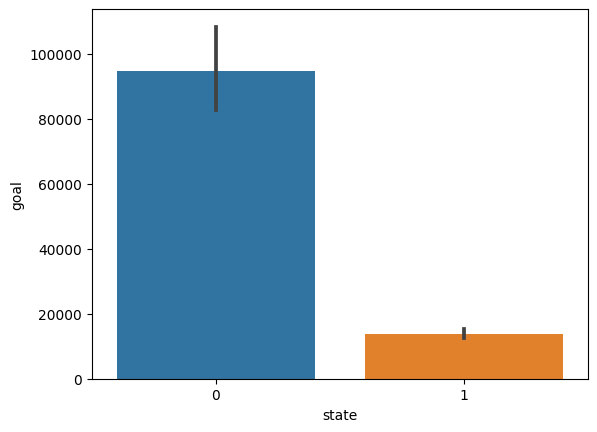

In [ ]:
pd.set_option('display.max_columns', None)

#df_2.corr()

sns.barplot(data=df_2, x="state", y="goal")

<AxesSubplot:xlabel='state', ylabel='goal'>

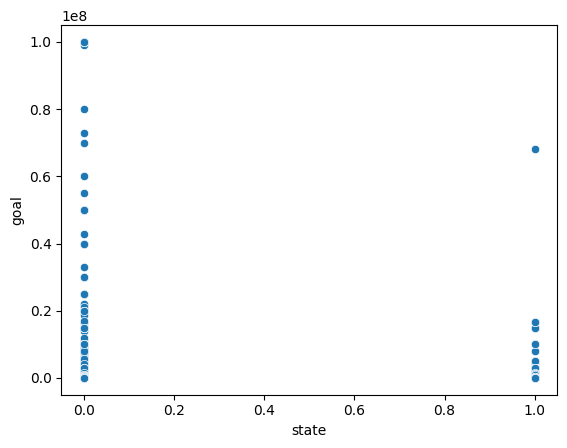

In [ ]:
sns.scatterplot(data=df_2, x="state", y="goal")

In [ ]:
df_2['state'].value_counts()

1    117465
0     75199
Name: state, dtype: int64

## Splitting and the data

For our models we need to split our data frame into test and train data set. Out of this we can do our baseline and big model.
At first we have to define our target and our features for the models.

In [ ]:
X = df_2.drop('state', axis= 1)
y = df_2['state']

print('Our features are:', list(X.columns))
print('Our target is: state')

Our features are: ['created_at', 'deadline', 'goal', 'launched_at', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'current_currency_CAD', 'current_currency_USD', 'staff_pick_False', 'staff_pick_True', 'usd_type_domestic', 'usd_type_international', 'category_slug_art', 'category_slug_comics', 'category_slug_crafts', 'category_slug_dance', 'category_slug_design', 'category_slug_fashion', 'category_slug_film & video', 'category_slug_food', 'category_slug_games', 'category_slug_journalism', 'category_slug_music',

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify = y, random_state=RSEED)
'''We stratify the test split because we have an imbalance in the state column of the dataset'''

print('Rows and columns of X_train', X_train.shape)
print('Rows and columns of y_train', y_train.shape)
print('Rows and columns of X_test', X_test.shape)
print('Rows and columns of y_test', y_test.shape)

Rows and columns of X_train (129084, 61)
Rows and columns of y_train (129084,)
Rows and columns of X_test (63580, 61)
Rows and columns of y_test (63580,)


## Base model and Base model evaluation

Our hypothesis is: 

    If the goal is lower than 20000 the project is more likely to succeed

In [ ]:
#to evaluate our baseline model we need a y_baseline. We decided that we have a successful project below 20000 so i will be 1.
# over 20000 i will be 0 for no success. So we can compare y_baseline with y_test to evaluate the model.
y_baseline = [1 if i <= 20000 else 0 for i in X_test['goal']]
y_baseline = np.array(y_baseline)
y_baseline

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_baseline)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_baseline)

print(cfm)


---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.27      0.37     24816
           1       0.66      0.89      0.76     38764

    accuracy                           0.65     63580
   macro avg       0.64      0.58      0.57     63580
weighted avg       0.64      0.65      0.61     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[ 6677 18139]
 [ 4139 34625]]


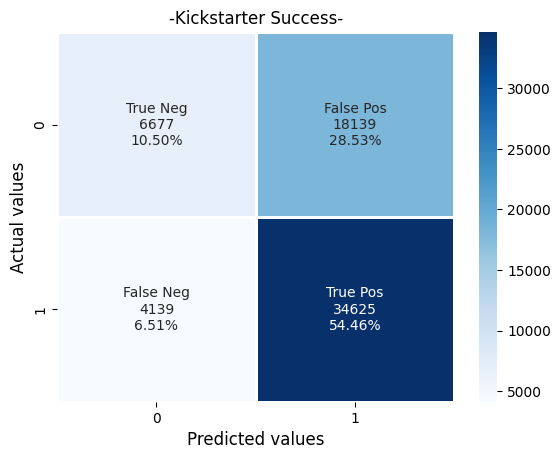

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

## Scaling all numerical data in our data frame

In [ ]:
# Initialize a scaler, then apply it to the features which are numerical and we want to scale 
num = ['created_at', 'deadline', 'goal', 'launched_at']

scaler = StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

# Show an example of a record with scaling applied
X_train.head()

,created_at,deadline,goal,launched_at,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,current_currency_CAD,current_currency_USD,staff_pick_False,staff_pick_True,usd_type_domestic,usd_type_international,category_slug_art,category_slug_comics,category_slug_crafts,category_slug_dance,category_slug_design,category_slug_fashion,category_slug_film & video,category_slug_food,category_slug_games,category_slug_journalism,category_slug_music,category_slug_photography,category_slug_publishing,category_slug_technology,category_slug_theater
24364,-0.222365,-0.314065,-0.038891,-0.289581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
165633,1.128730,1.067766,-0.039634,1.076723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157031,-0.877612,-0.910856,-0.032414,-0.909598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49783,0.181384,0.113233,-0.039209,0.116454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,-0.648533,-0.656351,-0.035812,-0.644543,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Creating different Models

In this case we have a classification problem, where we want to predict whether a project/campaign on kickstarter will succeed or net.
To classify them we will go for following models:

1. Decision Tree
2. XGBoost
3. KNNeighbors 
4. Random Forest

We will try them all and compare them at the end, to show which model performs best.




In [ ]:
#Import relevant classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier

## 1. Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=RSEED)
dtc.fit(X_train, y_train, sample_weight=None, check_input=True)

DecisionTreeClassifier(random_state=42)

In [ ]:
#make prediction for classifier above

y_pred_dt = dtc.predict(X_test)
y_pred_dt

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=dtc,
        param_grid={"max_depth": [2, 3, 4, 5, 6, 8, 10],
        'criterion': ['gini','entropy','log_loss'],
        'max_leaf_nodes': [2, 3, 4, 5, 6, 8, 10, 12, 14]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_dtc = grid.best_estimator_

y_pred_dt_gc = best_model_dtc.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

Best model has the following params:{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 12} and the best estimator is:DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=12,
                       random_state=42)


## XGboost Classifier

In [ ]:
boost = XGBClassifier(random_state=RSEED)
model_boost= boost.fit(X_train,y_train)

In [ ]:
#make prediction for classifier above

y_pred_boost = boost.predict(X_test)
y_pred_boost

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
boost.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)>

In [ ]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=boost,
        param_grid={"base_score": [0.3,0.5,0.6],
        'learning_rate': [0.1, 1, 10],
        'max_depth': [2, 4, 6, 8],
        'n_estimators': [50, 100, 200]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_boost = grid.best_estimator_

y_pred_boost_gc = best_model_boost.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

[16:46:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[16:46:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[16:46:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[16:46:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[16:46:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_leaf_nodes" } are not used.

[16:46:44] WARNING: /Users/runner/work/xgboost/xgboost/python-pac

KeyboardInterrupt: 

## KNeighbors

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#make prediction for classifier above

#y_pred_neigh = neigh.predict(X_test)
#y_pred_neigh

In [ ]:
neigh.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=3)>

In [ ]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=neigh,
        param_grid={"n_neighbors": [2, 3, 4, 5, 6, 10, 12],
        'weights': ['uniform','distance'],
        'metric': ['euclidean','manhattan','minkowski']},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_neigh = grid.best_estimator_

y_pred_neigh_gc = best_model_neigh.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

KeyboardInterrupt: 

## Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(random_state=RSEED)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#make prediction for classifier above

y_pred_forest = forest.predict(X_test)
y_pred_forest

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>

In [ ]:
#to tune our models we have find best parameters with GridSearchCV 
grid = GridSearchCV(estimator=forest,
        param_grid={'max_depth': [2, 4, 6, 8],
        'n_estimators': [50, 100, 200],
        'max_leaf_nodes': [2, 4, 6, 9, 12]},
        scoring="f1",
        cv=3)
        
grid.fit(X_train, y_train)
best_model_forest = grid.best_estimator_

y_pred_forest_gc = best_model_forest.predict(X_test)

print(f"Best model has the following params:{grid.best_params_} and the best estimator is:{grid.best_estimator_}")

## First evaluation of the models

blabla

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.27      0.40     24816
           1       0.67      0.94      0.78     38764

    accuracy                           0.68     63580
   macro avg       0.71      0.61      0.59     63580
weighted avg       0.70      0.68      0.63     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[ 6750 18066]
 [ 2140 36624]]


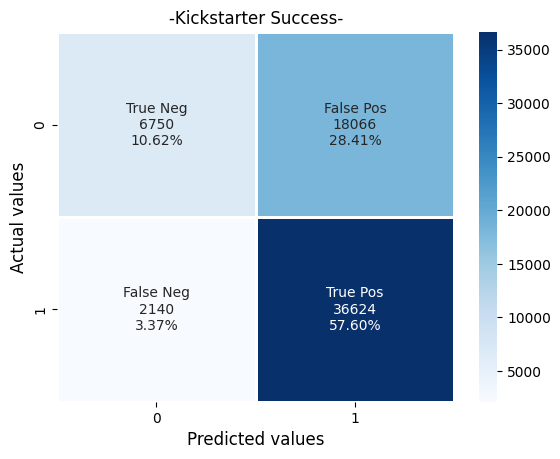

In [ ]:
#Evaluation of the Decision tree classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_dt_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_dt_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.60      0.64     24816
           1       0.76      0.83      0.79     38764

    accuracy                           0.74     63580
   macro avg       0.73      0.71      0.72     63580
weighted avg       0.74      0.74      0.74     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[14949  9867]
 [ 6686 32078]]


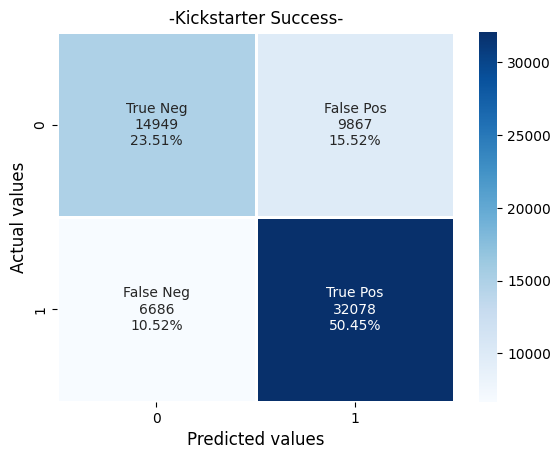

In [ ]:
#Evaluation of the XGboost classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_boost_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_boost_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.49      0.52     24816
           1       0.69      0.75      0.72     38764

    accuracy                           0.65     63580
   macro avg       0.62      0.62      0.62     63580
weighted avg       0.64      0.65      0.64     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[12047 12769]
 [ 9756 29008]]


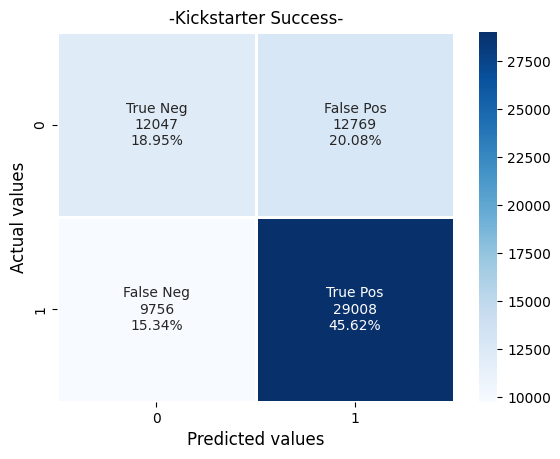

In [ ]:
#Evaluation of the KNeighbors classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_neigh_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_neigh_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

---------------------------------------------
Classification report
---------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.60      0.63     24816
           1       0.76      0.81      0.78     38764

    accuracy                           0.73     63580
   macro avg       0.71      0.70      0.71     63580
weighted avg       0.72      0.73      0.72     63580

---------------------------------------------
Confusion matrix
---------------------------------------------
[[14891  9925]
 [ 7382 31382]]


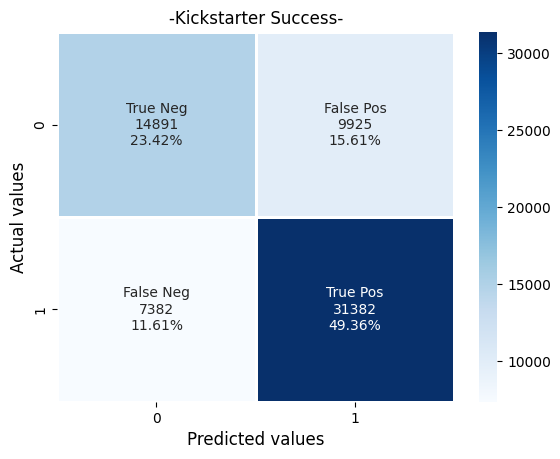

In [ ]:
#Evaluation of the RandomForest classifier
print('---------------------------------------------')
print('Classification report')
print('---------------------------------------------')

#built classification report
clr = classification_report(y_test,y_pred_forest_gc)

print(clr)
print('---------------------------------------------')
print('Confusion matrix')
print('---------------------------------------------')

# building confusion matrix
cfm = confusion_matrix(y_test,y_pred_forest_gc)

print(cfm)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues',linewidths = 1)
plt.xlabel('Predicted values',fontsize=12)
plt.ylabel('Actual values',fontsize=12)
plt.title('-Kickstarter Success-',fontsize=12)
plt.show()

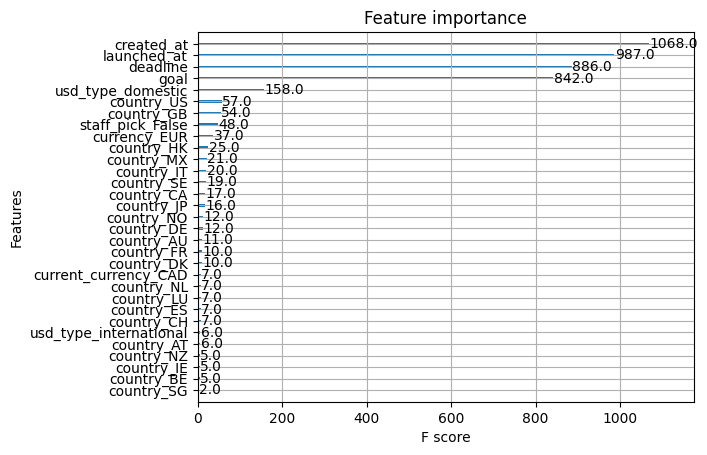

In [ ]:
#show the importance of features for xgboost classifier
plot_importance(model_boost)
pyplot.show()

## Voting classifier out of all models

With this voting we can compare all our models an tak the best one for our prediction

In [ ]:
model_vote = VotingClassifier(estimators = [('xgb', boost), ('knn', neigh), ('dt', dtc), ('rf', forest)], voting = 'hard')
model_vote.fit(X_train,y_train)
model_vote.score(X_test,y_test)
y_pred_vote = model_vote.predict(X_test)